# **Car Price Prediction with Machine Learning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df_cars = pd.read_csv('car data.csv', encoding='ascii')

# Display the first 5 rows and basic info
print(df_cars.head())
print(df_cars.info())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [2]:
# Basic EDA - check missing values and summary statistics
print(df_cars.isnull().sum())
print(df_cars.describe())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [4]:
# Preprocessing & Feature Engineering

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
y = df_cars['Selling_Price']
X = df_cars.drop(['Selling_Price'], axis=1)

# Identify numerical and categorical columns
num_cols = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
cat_cols = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

# Preprocess: scale numeric, one-hot encode categorical
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, num_cols),
                  ('cat', categorical_transformer, cat_cols)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

# Create pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', rf_model)])

# Train model
model.fit(X_train, y_train)

print('Model training completed')

Model training completed


MAE: 0.6085131147540972
RMSE: 0.9238150074929581
R2: 0.9629514863268397


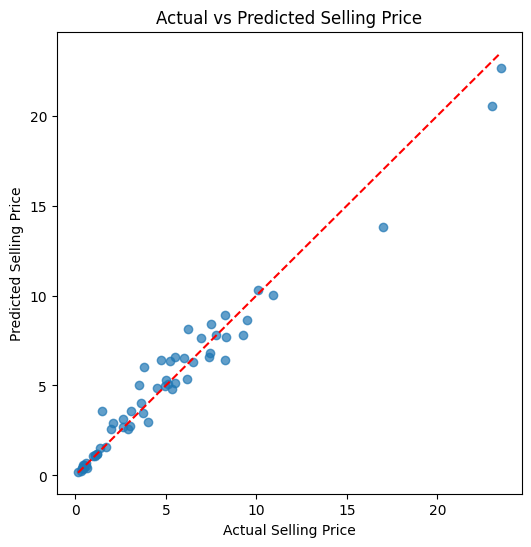

In [5]:
# Evaluate the model on test data

import numpy as np

# Predict selling prices using the model on test data
y_pred = model.predict(X_test)

# Calculate MAE, RMSE, and R2 metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('MAE:', mae)
print('RMSE:', rmse)
print('R2:', r2)

# Plot: Actual vs Predicted
# Create a scatter plot of actual vs predicted selling prices
# Add a reference line for perfect predictions
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()